# Investigate Volatility of SPY

This notebook investigates the volatility of SPY

### Import & Format Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from datetime import datetime, timedelta

In [19]:
spy = pd.read_csv('./data/price/SPY.csv', index_col='Date', parse_dates=True)
print('SPY\t', spy.shape)

# Limit data to last xx years
last_years = 255*2
# spy = spy.iloc[-last_years:]
print('SPY\t', spy.shape)

SPY	 (6688, 6)
SPY	 (6688, 6)


In [29]:
df = pd.DataFrame(spy['Adj Close'].rename('price'))
df['pct_change'] = df.price.pct_change()
df['log_return'] = np.log(df.price).diff()
df = df.iloc[1:]
y = df['pct_change']

1.041775925859406
1.0697919958783002


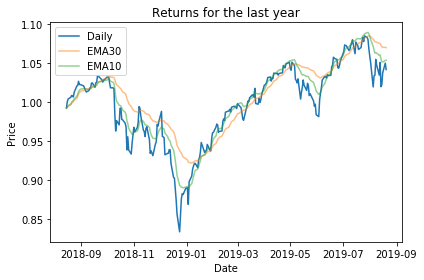

In [30]:
day_limit = 255

daily = np.cumprod([1] + y[-day_limit:])
ema10 = np.cumprod(([1] + y[-day_limit:]).ewm(span=10).mean().dropna())
ema30 = np.cumprod(([1] + y[-day_limit:]).ewm(span=30).mean().dropna())

print(daily[-1])
print(ema30[-1])

plt.plot(daily, label='Daily')
plt.plot(ema30, alpha=.5, label='EMA30')
plt.plot(ema10, alpha=.5, label='EMA10')

plt.title('Returns for the last year')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

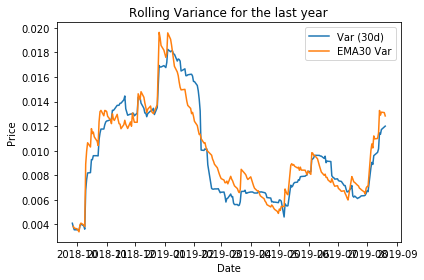

In [32]:
var30 = y[-day_limit:].rolling(30).std()
var10 = y[-day_limit:].rolling(10).std()
ema_var = y[-day_limit:].ewm(span=30).std()[30:]

plt.plot(var30, label='Var (30d)')
# plt.plot(var10, label='Var (10d)')
plt.plot(ema_var, label='EMA30 Var')

plt.title('Rolling Variance for the last year')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.tight_layout()
plt.show()